In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import weather_api_key
from citipy import citipy
from scipy.stats import linregress

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=6b9fca5bb7167ca8e527ee04dc1ced14&q=sauda'

In [3]:
response

{'coord': {'lon': 6.35, 'lat': 59.65},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 296.15,
  'feels_like': 294.81,
  'temp_min': 294.82,
  'temp_max': 298.15,
  'pressure': 1015,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 340},
 'clouds': {'all': 79},
 'dt': 1592312980,
 'sys': {'type': 1,
  'id': 1677,
  'country': 'NO',
  'sunrise': 1592273661,
  'sunset': 1592340988},
 'timezone': 7200,
 'id': 3140056,
 'name': 'Sauda',
 'cod': 200}

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [5]:
record_num = 1
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        new_record_num = record_num + 1
        data_json = requests.get(query_url + city).json()
        lat.append(data_json["coord"]["lat"])
        lng.append(data_json["coord"]["lon"])
        max_temp.append(data_json["main"]["temp_max"])
        cloudiness.append(data_json["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(data_json["wind"]["speed"])
        country.append(data_json["sys"]["country"])
        date.append(data_json["dt"])
        city_name.append(city)
        print(f"Processing Record {new_record_num} | {city}")
 
    except:
         print("City not found. Skipping...")

Processing Record 2 | hami
City not found. Skipping...
Processing Record 2 | akhtubinsk
Processing Record 2 | barrow
Processing Record 2 | harare
Processing Record 2 | anadyr
Processing Record 2 | tabuk
Processing Record 2 | cape town
City not found. Skipping...
Processing Record 2 | carnarvon
Processing Record 2 | batemans bay
Processing Record 2 | kavieng
Processing Record 2 | evensk
Processing Record 2 | maputo
Processing Record 2 | pierre
Processing Record 2 | ust-nera
Processing Record 2 | georgetown
Processing Record 2 | fortuna
Processing Record 2 | mar del plata
City not found. Skipping...
Processing Record 2 | dingle
Processing Record 2 | ushuaia
Processing Record 2 | sibolga
Processing Record 2 | busselton
Processing Record 2 | bonthe
Processing Record 2 | yellowknife
Processing Record 2 | castro
Processing Record 2 | kapaa
Processing Record 2 | rikitea
Processing Record 2 | kantunilkin
Processing Record 2 | natal
Processing Record 2 | mataura
Processing Record 2 | vaini
Proc

Processing Record 2 | mahebourg
Processing Record 2 | portland
Processing Record 2 | honningsvag
City not found. Skipping...
Processing Record 2 | nouadhibou
Processing Record 2 | easton
Processing Record 2 | los llanos de aridane
Processing Record 2 | turbat
Processing Record 2 | santiago del estero
Processing Record 2 | methoni
Processing Record 2 | kaduqli
Processing Record 2 | baiyin
Processing Record 2 | ribera
Processing Record 2 | ugoofaaru
Processing Record 2 | port hedland
Processing Record 2 | braganca
Processing Record 2 | ruteng
Processing Record 2 | saint anthony
Processing Record 2 | luderitz
Processing Record 2 | grindavik
Processing Record 2 | shache
Processing Record 2 | pisco
Processing Record 2 | monte alegre
Processing Record 2 | tiksi
Processing Record 2 | minjur
Processing Record 2 | astoria
Processing Record 2 | pochutla
Processing Record 2 | blacksburg
Processing Record 2 | zhanaozen
Processing Record 2 | genhe
Processing Record 2 | chokurdakh
Processing Record 

Processing Record 2 | jucas
Processing Record 2 | chacabuco
Processing Record 2 | pangai
Processing Record 2 | yatou
Processing Record 2 | mogadishu
Processing Record 2 | makakilo city
Processing Record 2 | bol
Processing Record 2 | geraldton
Processing Record 2 | san juan
Processing Record 2 | velikodvorskiy
Processing Record 2 | netrakona
Processing Record 2 | stara vyzhivka
Processing Record 2 | surt
Processing Record 2 | marquette
Processing Record 2 | nalut
City not found. Skipping...
Processing Record 2 | alibag
Processing Record 2 | saint-augustin
Processing Record 2 | surab
Processing Record 2 | biak
Processing Record 2 | uray
Processing Record 2 | nara
Processing Record 2 | biu
Processing Record 2 | liverpool
Processing Record 2 | uberaba
Processing Record 2 | tonantins
Processing Record 2 | igurubi
Processing Record 2 | ketchikan
Processing Record 2 | dakar
Processing Record 2 | saint-joseph
Processing Record 2 | tamiahua
Processing Record 2 | lardos
Processing Record 2 | pac

In [6]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame

weather_dict = {"Cities" : city_name, "Latitude":lat, "Longitude":lng, "Temp" : max_temp, "Humidity": humidity,
                "Cloudiness": cloudiness, "Windspeed" : wind_speed, "Country":country, "Date": date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,Cities,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,hami,42.80,93.45,92.08,56,0,4.50,CN,1592312993
1,akhtubinsk,48.28,46.17,89.15,56,0,11.79,RU,1592312994
2,barrow,71.29,-156.79,33.80,56,1,11.41,US,1592312994
3,harare,-17.83,31.05,66.02,56,1,9.22,ZW,1592312994
4,anadyr,64.75,177.48,41.00,56,26,6.31,RU,1592312994
...,...,...,...,...,...,...,...,...,...
557,lasa,46.62,10.70,66.99,56,75,8.05,IT,1592313111
558,porto novo,6.50,2.60,82.40,56,40,10.29,BJ,1592313111
559,homer,59.64,-151.55,51.80,56,1,6.49,US,1592313111
560,pokosnoye,55.53,101.05,55.98,56,89,7.34,RU,1592313111


In [7]:
# Inspect the data and remove the cities where the humidity > 100%
#  Get the indices of cities that have humidity over 100%.
update_df = weather_df[weather_df["Humidity"] > 100]
update_df

,Cities,Latitude,Longitude,Temp,Humidity,Cloudiness,Windspeed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [24]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv("output_data_file",index = False)

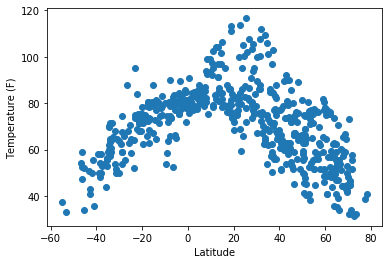

In [10]:
# Latitude vs. Temperature Plot
# Temperature (F) vs. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

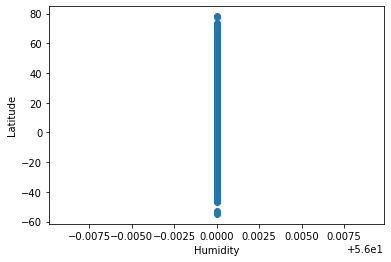

In [11]:
# Latitude vs. Humidity Plot
# Humidity (%) vs. Latitude
x_values = weather_df['Humidity']
y_values = weather_df['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.show()

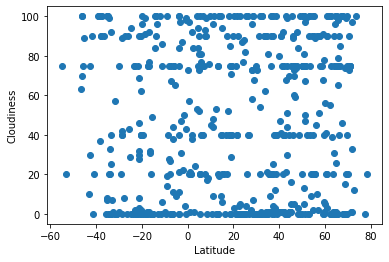

In [12]:
# Latitude vs. Cloudiness Plot
# Cloudiness (%) vs. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

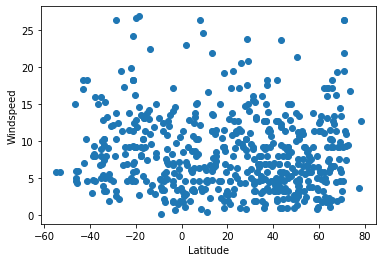

In [13]:
# Latitude vs. Wind Speed Plot
# Wind Speed (mph) vs. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.show()

In [14]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)
n_df = weather_df[weather_df["Latitude"] >= 0]
s_df = weather_df[weather_df["Latitude"] < 0]

In [15]:
def linear_reg(x_values, y_values, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

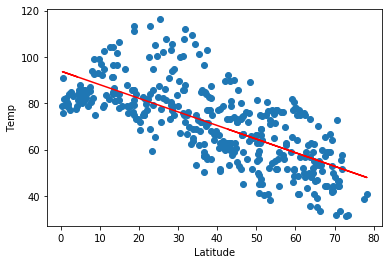

In [16]:
# Northern Hemisphere - Temperature (F) vs. Latitude
x_values = n_df["Latitude"]
y_values = n_df["Temp"]
linear_reg(x_values, y_values, "Temp")


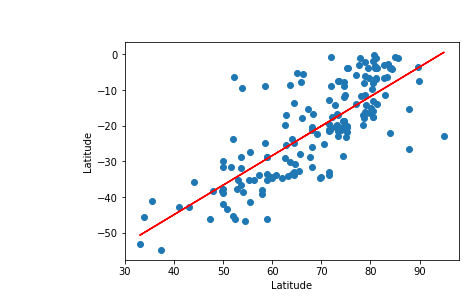

In [17]:
# Southern Hemisphere - Temperature (F) vs. Latitude
x_values = s_df["Temp"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")


In [18]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = n_df["Humidity"]
y_values = n_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")


C:\Users\SESA284039\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\SESA284039\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


ValueError: Image size of 849356x262 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [19]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = s_df["Humidity"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")


C:\Users\SESA284039\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\SESA284039\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


ValueError: Image size of 849356x301 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

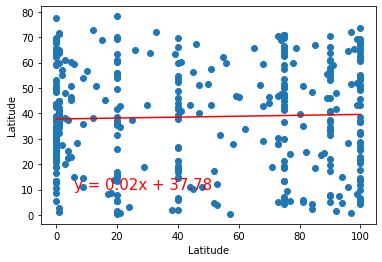

In [20]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = n_df["Cloudiness"]
y_values = n_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")

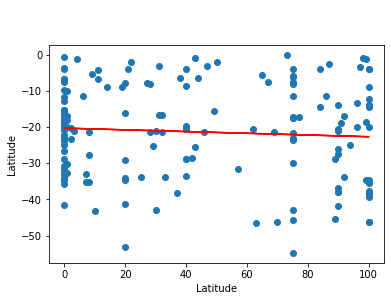

In [21]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = s_df["Cloudiness"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")

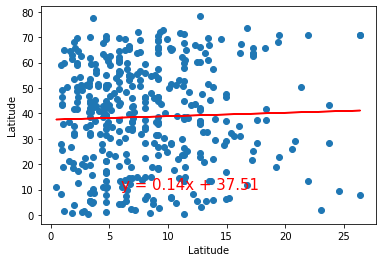

In [22]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = n_df["Windspeed"]
y_values = n_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")

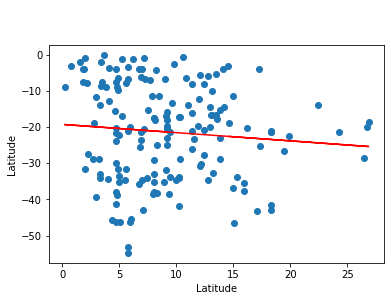

In [23]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
x_values = s_df["Windspeed"]
y_values = s_df["Latitude"]
linear_reg(x_values, y_values, "Latitude")